In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from drift_qec.oneangleheuristic import *
import seaborn as sns
sns.set_style("whitegrid")

/Users/yan/.miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


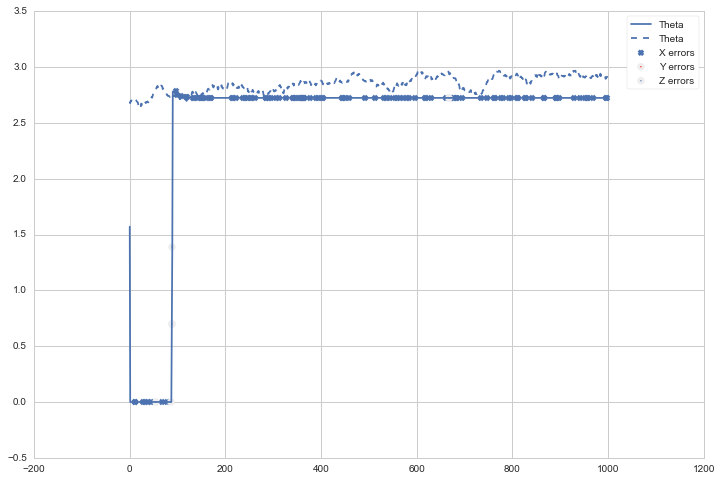

In [43]:
max_time = 1000
theta = Theta(max_time, grains=10000, sigma=0.01, k=5)
p = Constant(0.01, "p")

params = {"Theta": theta}
constants = {"p": p}

estimator = OneAngleDephasingEstimator(params, constants)
channel = OneAngleDephasingChannel(15, max_time)
report = Report("One Angle Dephasing")

time = 0
while time < max_time:
    s = channel.error(estimator.params, estimator.constants, time)
    estimator.update(s, time)
    report.record(s, time)
    time = time + 1
report.exit(time, "oot", estimator)

fig, ax = plt.subplots(figsize=(12, 8))
report.plot(ax, weightson=True)
ax.legend(frameon=True)